In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#Uploading data of immigration to Canada United nations report
canada = pd.read_excel('canada.xlsx')
canada.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2635,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,620,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3774,4331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
canada.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

canada.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

canada.columns = list(map(str, canada.columns))
canada.set_index('Country', inplace=True)

# add total column
canada['Total'] = canada.sum(axis=1)
years = list(map(str, range(1980, 2014)))
print('data dimensions:', canada.shape)

canada.head()

data dimensions: (195, 46)


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58639.0
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15699.0
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,4331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69439.0
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0


In [4]:
canada.drop(['Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50'], axis=1, inplace=True)
canada.head(2)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639.0
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699.0


In [5]:
canada_japan = canada.loc[['Japan'], years].transpose()
canada_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


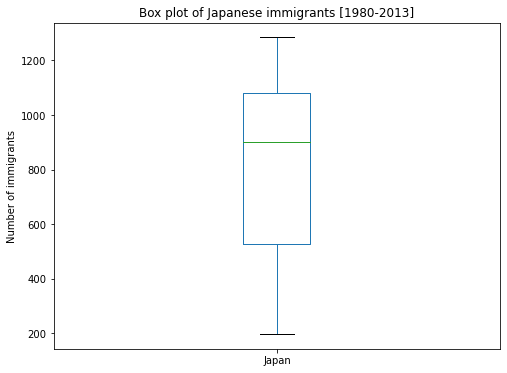

In [6]:
canada_japan.plot(kind='box', figsize=(8,6))

plt.title('Box plot of Japanese immigrants [1980-2013]')
plt.ylabel('Number of immigrants')

plt.show()

In [7]:
canada_china_india = canada.loc[['China', 'India'], years].transpose()
canada_china_india.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


In [8]:
canada_china_india.describe()

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


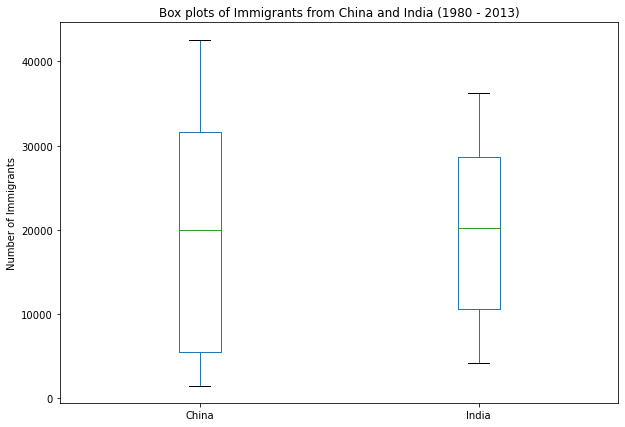

In [9]:
canada_china_india.plot(kind='box', figsize=(10, 7))

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.ylabel('Number of Immigrants')
plt.show()

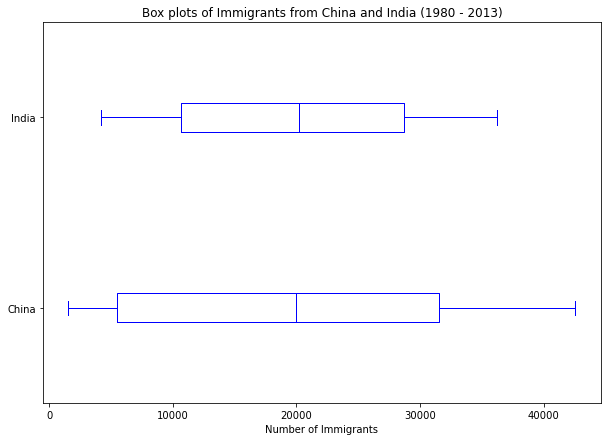

In [10]:
canada_china_india.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')
plt.show()

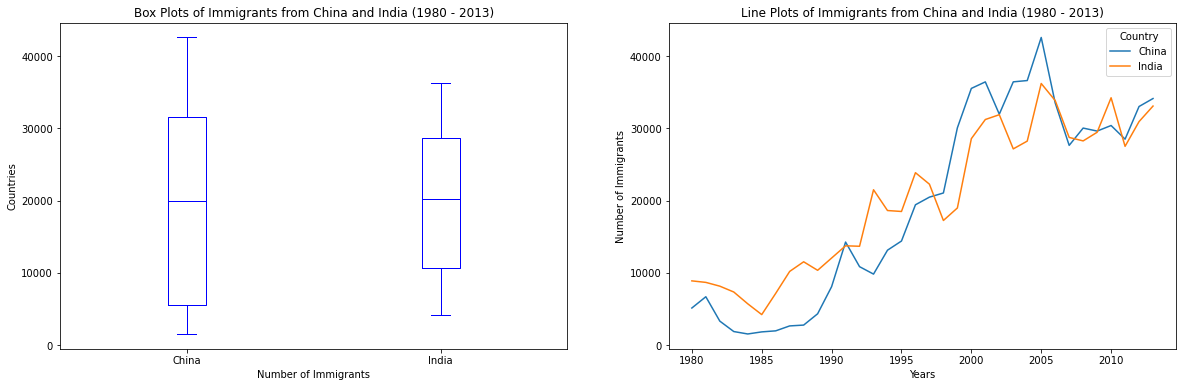

In [11]:
#subplot

fig = plt.figure()
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

# Subplot 1: Box plot
canada_china_india.plot(kind='box', color='blue', figsize=(20, 6), ax=ax0)

ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
canada_china_india.plot(kind='line', figsize=(20, 6), ax=ax1)
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')
plt.show()

In [12]:
canada_top15_countries = canada.sort_values(['Total'], ascending=False, axis=0).head(15)
canada_top15_countries

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904.0
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962.0
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500.0
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391.0
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600.0
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122.0
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923.0
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358.0
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581.0


In [13]:
# create a list of all years in decades 80's, 90's, and 00's
years_80s = list(map(str, range(1980, 1990)))
years_90s = list(map(str, range(1990, 2000)))
years_00s = list(map(str, range(2000, 2010)))

# slice the original dataframe df_can to create a series for each decade
df_80s = canada_top15_countries.loc[:, years_80s].sum(axis=1)
df_90s = canada_top15_countries.loc[:, years_90s].sum(axis=1)
df_00s = canada_top15_countries.loc[:, years_00s].sum(axis=1)

# merge the three series into a new data frame
canada_new = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s})

# display dataframe
canada_new.head()

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598


In [14]:
canada_new.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


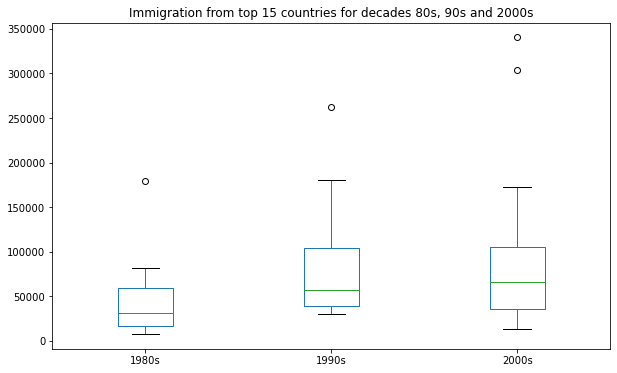

In [15]:
canada_new.plot(kind='box', figsize=(10, 6))
plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')
plt.show()